## Business Understanding

**Business Understanding**

In the agricultural industry, maximizing crop yield is a key priority to ensure food security, profitability, and sustainable farming practices. The provided dataset contains detailed agricultural data with 1,000,000 samples aimed at predicting crop yield in tons per hectare. Crop yield can be influenced by several factors such as geographical region, soil type, weather conditions, and farm management practices like the use of irrigation and fertilizers. Accurate prediction of crop yield is crucial for farmers, policymakers, and agribusinesses to make informed decisions.

**Problem Statement**

The goal is to predict crop yield (measured in tons per hectare) based on various environmental and operational factors. By leveraging this dataset, stakeholders can optimize farming practices, enhance resource allocation, and improve profitability. Predicting crop yield can help farmers plan their planting and harvesting cycles more efficiently, determine the best crop for a specific region, and manage inputs such as water, fertilizer, and labor.


**Key Business Objectives:**

- Increase Agricultural Efficiency: By accurately predicting yields, farmers can make better decisions on crop selection, resource use, and timing of operations, leading to better productivity.
- Optimize Resource Allocation: Better yield predictions can inform the application of fertilizers, irrigation, and other inputs, reducing waste and improving sustainability.
- Enhance Food Security: For governments and policymakers, crop yield prediction is vital in forecasting food production, managing supply chains, and preventing shortages.
- Maximize Profitability: Farmers and agribusinesses can use yield predictions to optimize operations and make strategic decisions to increase profitability.

**Business Success Criteria**

Prediction Accuracy: The model should accurately predict crop yield based on the provided factors to ensure farmers and businesses can rely on the recommendations.

**Cost Optimization:**

Farmers can reduce costs by applying precise amounts of fertilizers and water, depending on the predicted yield.
Sustainability Goals: By optimizing resource use, predictions can help in achieving more environmentally sustainable farming practices, aligning with global sustainability goals.

In summary, by developing a robust model to predict crop yield, the agricultural sector can improve decision-making, maximize production, and ensure sustainable resource use. This will result in more effective and profitable farming operations, contributing to food security and environmental sustainability.





##Data Understanding

The data from Kaggle <a href="https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield/data"> Here</a> you can find the data.


This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

* Region: The geographical region where the crop is grown (North, East, South, West).
* Soil_Type: The type of soil in which the crop is planted (Clay, Sandy, Loam, Silt, Peaty, Chalky).
* Crop: The type of crop grown (Wheat, Rice, Maize, Barley, Soybean, Cotton).
* Rainfall_mm: The amount of rainfall received in millimeters during the crop growth period.
* Temperature_Celsius: The average temperature during the crop growth period, measured in degrees Celsius.
* Fertilizer_Used: Indicates whether fertilizer was applied (True = Yes, False = No).
* Irrigation_Used: Indicates whether irrigation was used during the crop growth period (True = Yes, False = No).
* Weather_Condition: The predominant weather condition during the growing season (Sunny, Rainy, Cloudy).
* Days_to_Harvest: The number of days taken for the crop to be harvested after planting.
* Yield_tons_per_hectare: The total crop yield produced, measured in tons per hectare.

In [1]:
# Import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
file_path = 'crop_yield.csv'

yield_df = pd.read_csv(file_path)

print(f"The data contains {yield_df.shape[0]} rows and {yield_df.shape[1]} columns")

C:\Users\priya\AppData\Local\Temp\ipykernel_14456\171383084.py:3: DtypeWarning: Columns (11,12,13,14,15,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  yield_df = pd.read_csv(file_path)


The data contains 1000000 rows and 20 columns


In [3]:
yield_df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,NaN,standard,rescale,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,NaN,NaN,NaN,NaN


In [4]:
# Group columns by their data type
numerical_cols = yield_df.select_dtypes(include=["number"])
text_cols = yield_df.select_dtypes(include=["object"])
boolean_cols = yield_df.select_dtypes(include=["bool"])
numerical_cols.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Unnamed: 10,Unnamed: 16
0,897.077239,27.676966,122,6.555816,NaN,NaN
1,992.673282,18.026142,140,8.527341,NaN,NaN
2,147.998025,29.794042,106,1.127443,NaN,NaN
3,986.866331,16.644190,146,6.517573,NaN,NaN
4,730.379174,31.620687,110,7.248251,NaN,NaN


In [5]:
text_cols.head()

,Region,Soil_Type,Crop,Weather_Condition,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,West,Sandy,Cotton,Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South,Clay,Rice,Rainy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North,Loam,Barley,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North,Sandy,Soybean,Rainy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South,Silt,Wheat,Cloudy,standard,rescale,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,NaN,NaN,NaN


In [6]:
boolean_cols.head()

,Fertilizer_Used,Irrigation_Used
0,False,True
1,True,True
2,False,False
3,False,True
4,True,True


C:\Users\priya\AppData\Local\Temp\ipykernel_14456\3704296135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=yield_df, palette='viridis')
C:\Users\priya\AppData\Local\Temp\ipykernel_14456\3704296135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Soil_Type', data=yield_df, palette='magma')
C:\Users\priya\AppData\Local\Temp\ipykernel_14456\3704296135.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Crop', data=yield_df, palette='coolwarm')
C:\Users\priya\AppData\Local\Temp\ipykernel_14456\3704296135.

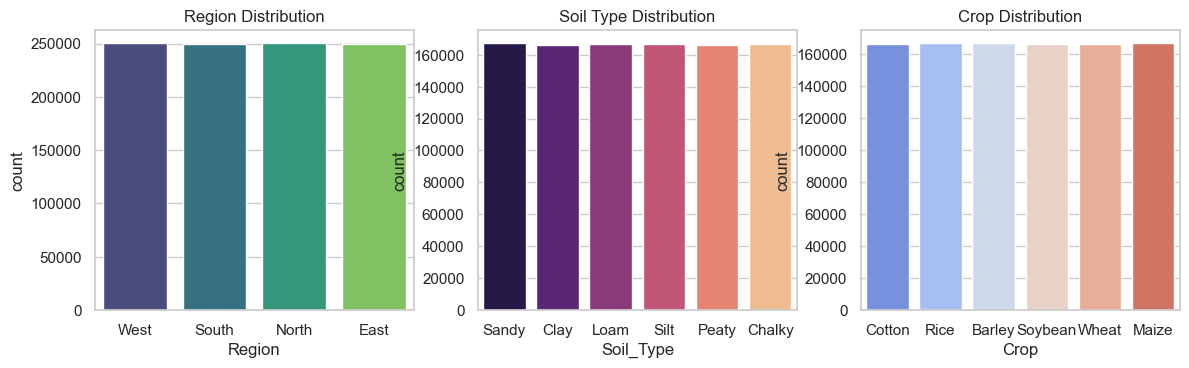

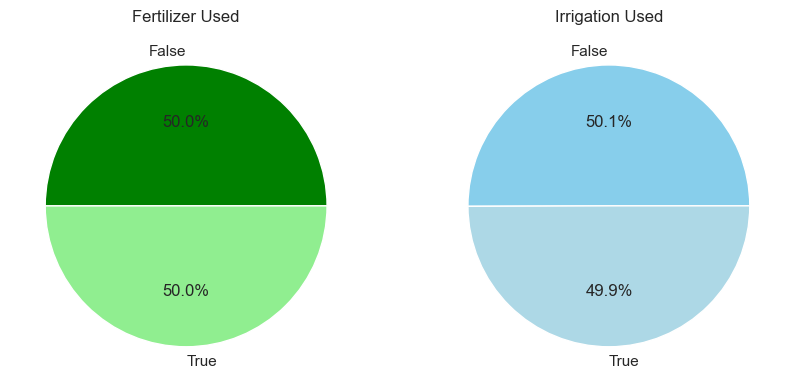

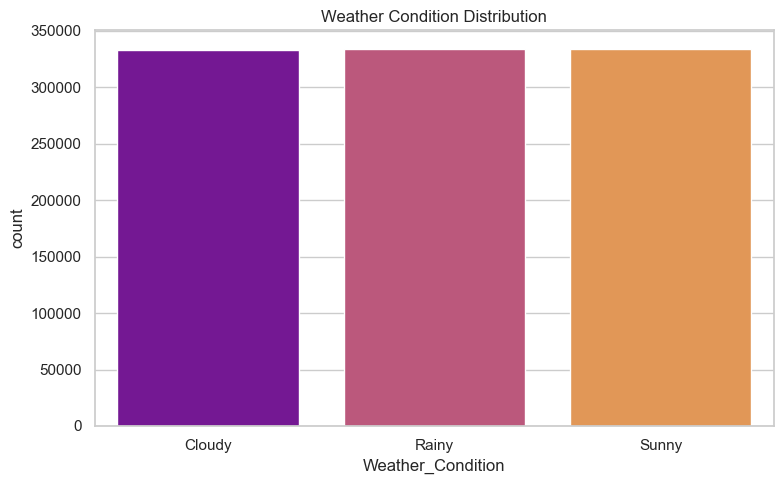

In [7]:
## draw categorical data

# Set the plot style
sns.set(style='whitegrid')

# Visualize the categorical data using bar charts
plt.figure(figsize=(14, 8))

# Region distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Region', data=yield_df, palette='viridis')
plt.title('Region Distribution');

# Soil Type distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Soil_Type', data=yield_df, palette='magma')
plt.title('Soil Type Distribution');

# Crop distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Crop', data=yield_df, palette='coolwarm')
plt.title('Crop Distribution');

# Fertilizer and Irrigation Usage (Pie Charts)
plt.figure(figsize=(10, 5))

# Fertilizer Used Pie Chart
plt.subplot(1, 2, 1)
fertilizer_counts = yield_df['Fertilizer_Used'].value_counts()
plt.pie(fertilizer_counts, labels=fertilizer_counts.index, autopct='%1.1f%%', colors=['green', 'lightgreen'])
plt.title('Fertilizer Used');

# Irrigation Used Pie Chart
plt.subplot(1, 2, 2)
irrigation_counts = yield_df['Irrigation_Used'].value_counts()
plt.pie(irrigation_counts, labels=irrigation_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightblue'])
plt.title('Irrigation Used');

# Weather Condition Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Weather_Condition', data=yield_df, palette='plasma')
plt.title('Weather Condition Distribution');

# Display all plots
plt.tight_layout()
plt.show();


From the previous visualizations we can notice the following
- The uniform distributions across regions, soil types, crops, and Weather_Condition suggest that the dataset is well-balanced, which is ideal for building unbiased models for prediction or analysis.
- The near-equal use of fertilizer and irrigation allows for a fair comparison of their impact on crop yields.

In [ ]:
# Rainfall and Temperature Histograms
plt.figure(figsize=(14, 8))

# Rainfall distribution
plt.subplot(2, 2, 1)
sns.histplot(yield_df['Rainfall_mm'], bins=20, kde=True, color='blue')
plt.title('Rainfall Distribution (mm)')

# Temperature distribution
plt.subplot(2, 2, 2)
sns.histplot(yield_df['Temperature_Celsius'], bins=20, kde=True, color='red')
plt.title('Temperature Distribution (Celsius)')


# Days to Harvest and Yield Histograms
plt.figure(figsize=(14, 6))

# Days to Harvest Histogram
plt.subplot(1, 2, 1)
sns.histplot(yield_df['Days_to_Harvest'], bins=20, kde=True, color='purple')
plt.title('Days to Harvest Distribution')

# Yield tons per hectare Histogram
plt.subplot(1, 2, 2)
sns.histplot(yield_df['Yield_tons_per_hectare'], bins=20, kde=True, color='orange')
plt.title('Yield (tons per hectare) Distribution')

# Display all plots
plt.tight_layout()
plt.show();

The previous distributions suggest a balanced dataset that includes a wide variety of climatic conditions, crop cycles, and yields, making it well-suited for modeling predictions related to yield based on environmental factors.

## Data Preparation

Since the distrubtion of data is balanced, we will start by prepare data to the models. We will do the following:
1. Check Nas and check duplicates.
2. Apply OneHot encoding on categorical data.
3. Apply StandardScaler on numerical data

### Check the data

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Replace the path with your actual file path in Google Drive
file_path = 'crop_yield.csv'

yield_df = pd.read_csv(file_path)
yield_df

C:\Users\priya\AppData\Local\Temp\ipykernel_14456\3630245233.py:4: DtypeWarning: Columns (11,12,13,14,15,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  yield_df = pd.read_csv(file_path)


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,NaN,standard,rescale,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Bibi

# Check the missing value and shape of the data before and after dropna
print("Before dropna:", yield_df.shape)
yield_df_cleaned = yield_df.dropna()
print("After dropna:", yield_df_cleaned.shape)

#No duplicates found.
duplicates = yield_df_cleaned.duplicated().sum()
print("Number of duplicates:", duplicates)
if duplicates == 0:
    print("No duplicates found.")
else:
    yield_df_cleaned = yield_df_cleaned.drop_duplicates()
    print("Duplicates removed.")

#Confirm Preprocessing Steps Completed
print("Missing values:", yield_df_cleaned.isna().sum().sum()) # No missing value found
print("Final shape after preprocessing:", yield_df_cleaned.shape)


Before dropna: (1000000, 20)
After dropna: (0, 20)
Number of duplicates: 0
No duplicates found.
Missing values: 0
Final shape after preprocessing: (0, 20)


This step makes sure the data is clean and ready to use. By removing missing values and duplicates, we avoid mistakes and ensure accurate results. Checking the data at the end confirms everything is properly prepared for the next steps.


The dataset contains 1,000,000 rows and 10 columns, and preprocessing revealed **no missing values or duplicates**. The shape of the data remained unchanged at (1000000, 10) after cleaning, indicating it is clean and ready for analysis and modeling.

In [11]:
yield_df_cleaned.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19


### Apply OneHot encoding on categorical data.

In this project, we preprocess a dataset containing both numeric and categorical features to prepare it for the analysis.
Categorical data often presents challenges for the algorithms, which typically require numerical input.
To address this, we utilize one-hot encoding to transform categorical features into binary (0 or 1)
columns, making them suitable for model training. Here one-hot encoding applied to coloumns Region, Soil_Type, Crop, Weather_Condition,Fertilizer_Used, Irrigation_Used

The resulting dataset, now fully numeric, is optimized for algorithms. This preprocessing pipeline
provides a structured approach for handling mixed data types, enabling effective model development and enhancing predictive
performance.

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Drop unnecessary empty columns
yield_df = yield_df.loc[:, ~yield_df.columns.str.contains('^Unnamed')]

# Define categorical columns (check that they exist)
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition', 'Fertilizer_Used', 'Irrigation_Used']

# Fill missing categorical values with 'Unknown'
for col in categorical_cols:
    yield_df[col] = yield_df[col].fillna('Unknown')

# Drop rows where the target is missing
target_col = 'Yield_tons_per_hectare'
yield_df_cleaned = yield_df.dropna(subset=[target_col])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
yield_df_encoded = encoder.fit_transform(yield_df_cleaned[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(yield_df_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate numeric columns with encoded categorical columns
numeric_cols = yield_df_cleaned.drop(columns=categorical_cols).columns
yield_final_data = pd.concat([yield_df_cleaned[numeric_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Define X and y
X = yield_final_data.drop(target_col, axis=1)
y = yield_final_data[target_col]

print("Final dataset ready for modeling:")
display(yield_final_data.head())

C:\Users\priya\AppData\Local\Temp\ipykernel_14456\2497095823.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_df[col] = yield_df[col].fillna('Unknown')


Final dataset ready for modeling:


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny,Fertilizer_Used_True,Irrigation_Used_True
0,897.077239,27.676966,122,6.555816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,992.673282,18.026142,140,8.527341,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,147.998025,29.794042,106,1.127443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,986.866331,16.644190,146,6.517573,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,730.379174,31.620687,110,7.248251,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Your categorical columns (make sure names match exactly!)
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition', 'Fertilizer_Used', 'Irrigation_Used']

In [15]:
if 'yield_df_cleaned' not in globals():
    print("ERROR: 'yield_df_cleaned' is not defined in this session.")
    print("→ Please run the cells that create/load/clean yield_df_cleaned first.")
elif yield_df_cleaned is None or not isinstance(yield_df_cleaned, pd.DataFrame):
    print("ERROR: yield_df_cleaned exists but is not a pandas DataFrame.")
else:
    print(f"Rows in yield_df_cleaned: {len(yield_df_cleaned):,}")
    
    # Check if any of the required columns are missing
    missing_cols = [col for col in categorical_cols if col not in yield_df_cleaned.columns]
    if missing_cols:
        print("ERROR: The following categorical columns are missing:")
        print(missing_cols)
        print("Available columns:", yield_df_cleaned.columns.tolist())
    elif len(yield_df_cleaned) == 0:
        print("ERROR: yield_df_cleaned is EMPTY (0 rows). Cannot encode.")
        print("→ Check your data loading / filtering steps — where did all rows go?")
    else:
        print("Encoding started...")

        encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

        try:
            # Fit & transform
            encoded_array = encoder.fit_transform(yield_df_cleaned[categorical_cols])
            
            # Create clean column names
            encoded_df = pd.DataFrame(
                encoded_array,
                columns=encoder.get_feature_names_out(categorical_cols),
                index=yield_df_cleaned.index
            )
            
            # Combine: numeric columns + encoded columns
            numeric_cols = [col for col in yield_df_cleaned.columns if col not in categorical_cols]
            yield_final_data = pd.concat(
                [yield_df_cleaned[numeric_cols].reset_index(drop=True),
                 encoded_df.reset_index(drop=True)],
                axis=1
            )
            
            print("\nEncoding successful!")
            print(f"Original shape: {yield_df_cleaned.shape}")
            print(f"Final shape:    {yield_final_data.shape}")
            print(f"New columns added: {len(yield_final_data.columns) - len(numeric_cols)}")
            
            # Optional: quick preview
            display(yield_final_data.head(3))
            
        except Exception as e:
            print("Encoding failed:")
            print(str(e))
            print("\nTip: Check if all categorical columns contain valid data (no all-NaN column, etc.)")

Rows in yield_df_cleaned: 1,000,000
Encoding started...

Encoding successful!
Original shape: (1000000, 10)
Final shape:    (1000000, 21)
New columns added: 17


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny,Fertilizer_Used_True,Irrigation_Used_True
0,897.077239,27.676966,122,6.555816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,992.673282,18.026142,140,8.527341,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,147.998025,29.794042,106,1.127443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Apply StandardScaler on numerical data

The dataset contains numerical columns like <b> Rainfall_mm, Temperature_Celsius, Days_to_Harvest</b>. Numerical columns likely represent continuous variables that needs to be standardized.

Below are the reasons for using standard scaler
1. Features like rainfall, temperature or days to harvest have different scales or units. This can confuse machine learning model because larger numbers may seem more important than smaller number.
2. In this data outliers are of extreme values like unsual high rainfall or temperature. Standard scaler is less affected by outliers because it focuses on the 'average' of the data, not the extreme values.

In [23]:

#applying standard scalar

yield_final_data.head()
# Selecting only the numerical columns for scaling
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
yield_df_scaled = yield_final_data.copy()
yield_df_scaled[numerical_cols] = scaler.fit_transform(yield_df_scaled[numerical_cols])

# Display the first few rows of the scaled dataset
yield_df_scaled.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny,Fertilizer_Used_True,Irrigation_Used_True
0,1.335747,0.023821,0.674477,6.555816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.703634,-1.312747,1.368028,8.527341,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,-1.546977,0.317020,0.057988,1.127443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.681287,-1.504137,1.599212,6.517573,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.694233,0.569997,0.212110,7.248251,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [24]:
yield_df_scaled.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny,Fertilizer_Used_True,Irrigation_Used_True
0,1.335747,0.023821,0.674477,6.555816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.703634,-1.312747,1.368028,8.527341,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,-1.546977,0.317020,0.057988,1.127443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.681287,-1.504137,1.599212,6.517573,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.694233,0.569997,0.212110,7.248251,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [18]:
yield_df_scaled.to_csv("yield_df_cleaned.csv", index=False)

## Modeling and Evaluation

In this section we will apply three models on the data we prepared in the previous section:
1. Regression
2. Decision Tree
3. Random Forest

In [19]:
import pandas as pd
yield_df_scaled = pd.read_csv("yield_df_cleaned.csv")
yield_df_scaled.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny,Fertilizer_Used_True,Irrigation_Used_True
0,1.335747,0.023821,0.674477,6.555816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.703634,-1.312747,1.368028,8.527341,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,-1.546977,0.317020,0.057988,1.127443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.681287,-1.504137,1.599212,6.517573,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.694233,0.569997,0.212110,7.248251,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


### Regression


MSE and R-squared :
Mean Squared Error: 0.2507766685727919
R-squared Score: 0.9130137709137078

KFold Cross-Validation:
K-Fold Cross-Validation k =  5
Mean Squared Error (Mean) : -0.2504863272573392
Mean Squared Error (Std) : 0.0006469513966243182
kfold_rmse(Mean) : 0.5004856731184603

Monte Carlo Cross-Validation:
Mean Squared Error (Mean) : -0.25080081383129665
Mean Squared Error (Std) : 0.0010385420158879166
Monto Carlo_rmse(Mean) : 0.5007991027540524


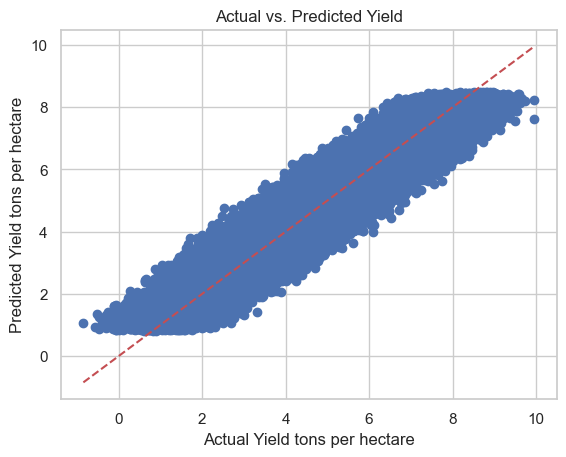

In [20]:
#Linear Regression Model - Vru

# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import ShuffleSplit

# Assuming 'Yield_tons_per_hectare' is the target variable
X = yield_df_scaled.drop('Yield_tons_per_hectare', axis=1)  # Features
y = yield_df_scaled['Yield_tons_per_hectare']               # Target

# Splitting the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)
y_pred

print("\nMSE and R-squared :")
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

#Evaluation :

#K-fold Cross-Validation

# Define k-fold cross-validation with 5 folds
k = 5
kf_splits = KFold(n_splits=k, shuffle=True, random_state=42)
kf_scores = cross_val_score(regressor, X, y, cv=kf_splits, scoring='neg_mean_squared_error')
kf_rmse = np.sqrt(-kf_scores)

# Calculate average metrics across folds
print("\nKFold Cross-Validation:")
print("K-Fold Cross-Validation k = ", k)
print("Mean Squared Error (Mean) :", kf_scores.mean())
print("Mean Squared Error (Std) :", kf_scores.std())
print("kfold_rmse(Mean) :", kf_rmse.mean())

# Monte Carlo Cross-Validation

# Define Monte Carlo cross-validation with 10 random splits
n = 10
mc_split = ShuffleSplit(n_splits=n, test_size=0.2, random_state=42)
mc_scores = cross_val_score(regressor, X_train, y_train, cv=mc_split, scoring='neg_mean_squared_error')
mc_rmse = np.sqrt(-mc_scores)

# Calculate average metrics across splits
print("\nMonte Carlo Cross-Validation:")
print("Mean Squared Error (Mean) :", mc_scores.mean())
print("Mean Squared Error (Std) :", mc_scores.std())
print("Monto Carlo_rmse(Mean) :", mc_rmse.mean())


#show the data points

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.xlabel("Actual Yield tons per hectare")
plt.ylabel("Predicted Yield tons per hectare")

plt.title("Actual vs. Predicted Yield")
plt.show()

**Performance Overview:**

The Linear Regression model offers a reasonable baseline, with an R² score of 0.91301, explaining about 91.301% of the variance in yield data. This suggests that the model captures much of the data’s underlying structure, though the relatively high Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) indicate that there is still notable prediction error. Thus, while the model fits the data fairly well, there is room to improve its accuracy.

### Decision Tree
we use a Decision Tree because it’s simple, interpretable, and handles both numerical and categorical data well. It splits data based on conditions to make predictions, works for small to large datasets, and doesn’t require scaling or complex preprocessing.

Mean Squared Error (MSE): 0.5322251728822838
Root Mean Squared Error (RMSE): 0.7295376432249975
R-squared (R²): 0.8153884845934478
Mean Absolute Error (MAE): 0.583212320106475

K-Fold Cross-Validation RMSE Scores: [0.72739664 0.7310582  0.72805542 0.72927404 0.72924765]
Mean RMSE from K-Fold Cross-Validation: 0.7290063882601852
Mean RMSE from Monte Carlo Cross-Validation: 0.7275704841628896


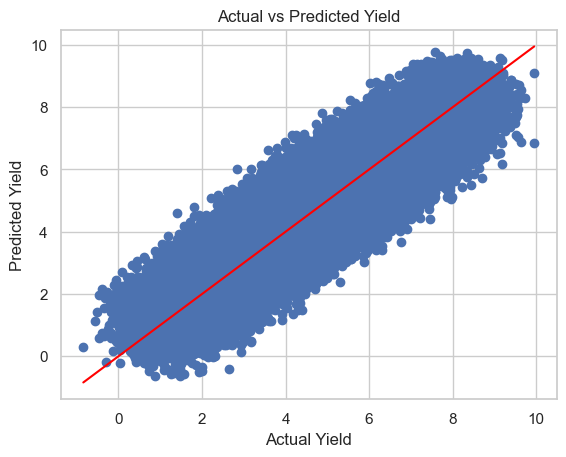

In [21]:
# DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split, ShuffleSplit

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)# Ensures consistent results by fixing the randomization seed.
tree_model.fit(X_train, y_train)#Trains the model on the training data (X_train, y_train).

# Make predictions
y_pred = tree_model.predict(X_test) # Use the trained model to predict target values for the test set

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#Divides the dataset into fixed folds with no overlap, ensuring each data point is used for both training and testing exactly once.
kfold_scores = cross_val_score(tree_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
kfold_rmse = np.sqrt(-kfold_scores)# Converts the negative MSE scores to positive RMSE values for easier interpretation.


# Monte Carlo Cross-Validation (ShuffleSplit)
monte_carlo_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#Creates random splits each time, allowing more flexibility and randomness in training/testing.
monte_carlo_scores = cross_val_score(tree_model, X_train, y_train, cv=monte_carlo_split, scoring='neg_mean_squared_error')
monte_carlo_rmse = np.sqrt(-monte_carlo_scores)



# Output evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
#Square root of MSE, shows error in same units as target; crucial for intuitive understanding.
print(f"Root Mean Squared Error (RMSE): {rmse}")
#Explains variance captured by the model; higher R² indicates better fit.
print(f"R-squared (R²): {r2}")
#Average absolute prediction errors; useful for understanding typical prediction error.
print(f"Mean Absolute Error (MAE): {mae}")
#RMSE for each fold, showing model performance stability across splits.
print("\nK-Fold Cross-Validation RMSE Scores:", kfold_rmse)
#Average RMSE across folds; ensures reliable overall performance measure.
print(f"Mean RMSE from K-Fold Cross-Validation: {kfold_rmse.mean()}")
#Average RMSE across random splits; validates model consistency under varied scenarios.
print(f"Mean RMSE from Monte Carlo Cross-Validation: {monte_carlo_rmse.mean()}")

# Visualize Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()



 **Performance Overview:**

The Decision Tree model provides decent performance but lags behind other models in terms of accuracy (MSE) and R². With an R² of 0.8155, the model explains about 81.5% of the variance in the data, but the relatively high MSE and RMSE indicate there is room for improvement in reducing prediction error.


We calculate RMSE and mean MSE for both K-Fold and Monte Carlo cross-validation to evaluate how well the model performs across different splits of the data. Here's why:


Mean MSE (or RMSE): Tells us the average error of the model, giving a general idea of its performance.

Standard Deviation (Std): Shows how consistent the model's performance is across different splits. A smaller Std means the model is more stable.






### Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees during training and combines their outputs to improve performance to make predictions. This reduces the risk of overfitting, which is common in single decison tree. Random forest uses a technique called bagging. Each tree in the forest contributes one vote for an average prediction for regression. It randomly samples the data.

We have splited the dataset into train set and test set and then intialized the random forest regression. In below code there is a "n_estimator" defines number of tree in the forest.

For this dataset, we used Random Forest Regressor because the target variable, Yield (tons per hectare), is continuous.

**Performance Overview**

The Random Forest model has been trained, and its performance was evaluated using the Mean Squared Error (MSE) and R2:

MSE: 0.27.

R-squared Score: 0.90

We have used k-fold cross validation to evaluate the performance of model. It ensures that a model is tested on different subsets of the data, providing more reliable assessment of its predictive accuracy.

We have also used Monte carlo cross validation, which involves randomly splitting of dataset into training and testing sets multiple times. For each split, a model is trained and the performance is evaluated.

In [22]:
#Implementing Random Forest on yield dataset 
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=20)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pred

array([4.12384953, 4.45562003, 7.04236954, ..., 4.36702349, 3.90530264,
       6.01807736], shape=(200000,))

Mean Squared Error: 0.27713166644255915
R-squared Score: 0.9038720836294982


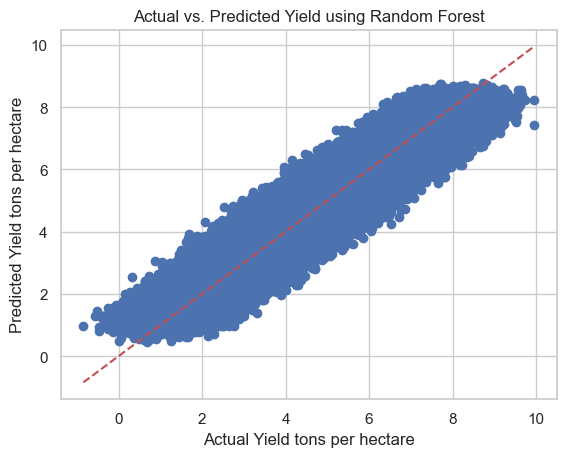

In [25]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


#show the data points

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.xlabel("Actual Yield tons per hectare")
plt.ylabel("Predicted Yield tons per hectare")

plt.title("Actual vs. Predicted Yield using Random Forest")
plt.show()

In [ ]:
#k-fold method for Random Forest on yield dataset 

from sklearn.model_selection import cross_val_score, KFold
from statistics import mean

# Set up k-fold cross-validation (using 5 folds as an example)
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the scores
kfold_scores = cross_val_score(rf, X, y, cv=kfold, scoring='neg_mean_squared_error')

kfold_rmse_scores = np.sqrt(-kfold_scores)––
kfold_rmse_scores

In [ ]:
#Monte Carlo on Random Forest 
from sklearn.model_selection import ShuffleSplit

# Set up Monte Carlo cross-validation (using 10 random splits as an example)
n_splits = 5
monte_carlo_split = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Perform Monte Carlo cross-validation and calculate RMSE for each split
monte_carlo_scores = cross_val_score(rf, X, y, cv=monte_carlo_split, scoring='neg_mean_squared_error')
monte_carlo_rmse_scores = np.sqrt(-monte_carlo_scores)

# Display Monte Carlo cross-validation results
monte_carlo_rmse_scores, monte_carlo_rmse_scores.mean(), monte_carlo_rmse_scores.std()

(array([0.52634798, 0.52750905, 0.52445174, 0.52688801, 0.52910899]),
 0.526861153879695,
 0.001519333444347431)

### SVR model


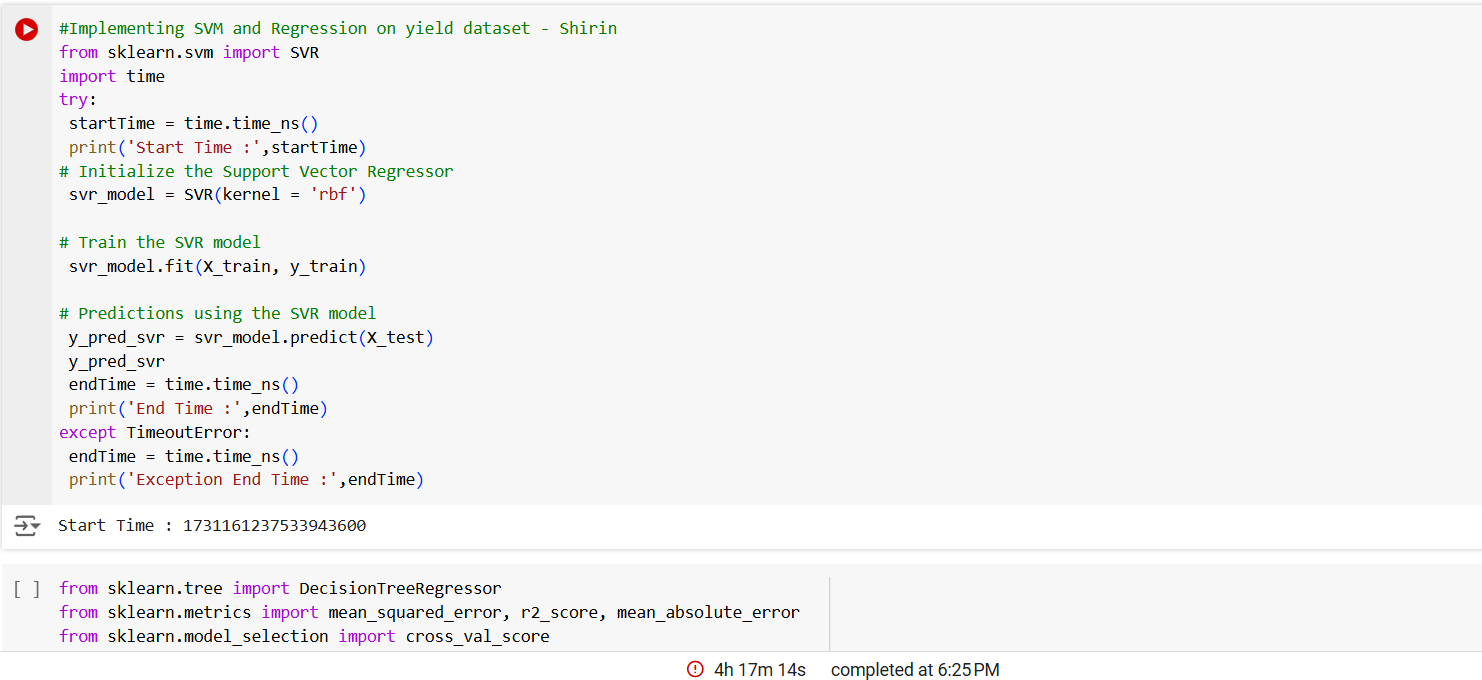





**We tired to implement SVM model on yield dataset, but everytime it throws error and the model doesnt give any result.**

### Convert Previous to function

Make a function that streamline the process of training and evaluating the model

#### Functions

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
def evaluate_model_monte_carlo(regressor, n, X_train, y_train,):
  mc_split = ShuffleSplit(n_splits=n, test_size=0.2, random_state=42)
  mc_scores = cross_val_score(regressor, X_train, y_train, cv=mc_split, scoring='neg_mean_squared_error')
  mc_rmse = np.sqrt(-mc_scores)

  # Calculate average metrics across splits
  print("\nMonte Carlo Cross-Validation:")
  print("n = ",n)
  print("Mean Squared Error (Mean) :", mc_scores.mean())
  print("Mean Squared Error (Std) :", mc_scores.std())
  print("Monto Carlo_rmse(Mean) :", mc_rmse.mean())

In [ ]:
def evaluate_model_k_fold(regressor, k, X, y):
  kfold = KFold(n_splits=k, shuffle=True, random_state=42)

  # Perform k-fold cross-validation and get the scores
  kfold_scores = cross_val_score(regressor, X, y, cv=kfold, scoring='neg_mean_squared_error')

  kfold_rmse_scores = np.sqrt(-kfold_scores)

  # Calculate average metrics across folds
  print("\nKFold Cross-Validation:")
  print("K-Fold Cross-Validation k = ", k)
  print("Mean Squared Error (Mean) :", kfold_scores.mean())
  print("Mean Squared Error (Std) :", kfold_scores.std())
  print("kfold_rmse(Mean) :", kfold_rmse_scores.mean())

In [ ]:
def draw_relationship_between_predicted_and_actual(y_test, y_pred):
  plt.scatter(y_test, y_pred)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

  plt.xlabel("Actual Yield tons per hectare")
  plt.ylabel("Predicted Yield tons per hectare")

  plt.title("Actual vs. Predicted Yield")
  plt.show()

In [ ]:
def train_model(model_object, k_fold, n_monte_carlo, X_updated=False, new_X= pd.DataFrame()):

  # Assuming 'Yield_tons_per_hectare' is the target variable
  X = yield_df_scaled.drop('Yield_tons_per_hectare', axis=1)  # Features
  y = yield_df_scaled['Yield_tons_per_hectare']               # Target

  if(X_updated):
    X = new_X.copy()

  # Splitting the dataset into training and test sets (80% training, 20% testing)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize the Linear Regression model
  regressor = model_object

  # Fit the model on the training data
  regressor.fit(X_train, y_train)

  # Predict on the test data
  y_pred = regressor.predict(X_test)
  y_pred

  print("\nMSE and R-squared :")
  # Mean Squared Error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")

  # R-squared score (coefficient of determination)
  r2 = r2_score(y_test, y_pred)
  print(f"R-squared Score: {r2}")

  evaluate_model_k_fold(regressor, k_fold, X, y)
  evaluate_model_monte_carlo(regressor, n_monte_carlo, X_train, y_train)
  draw_relationship_between_predicted_and_actual(y_test, y_pred)

##### Linear Regression


MSE and R-squared :
Mean Squared Error: 0.25077666857197467
R-squared Score: 0.9130137709140372

KFold Cross-Validation:
K-Fold Cross-Validation k =  5
Mean Squared Error (Mean) : -0.2504863272572713
Mean Squared Error (Std) : 0.0006469513967552472
kfold_rmse(Mean) : 0.5004856731183922

Monte Carlo Cross-Validation:
n =  10
Mean Squared Error (Mean) : -0.25080081383095476
Mean Squared Error (Std) : 0.001038542016011318
Monto Carlo_rmse(Mean) : 0.5007991027537108


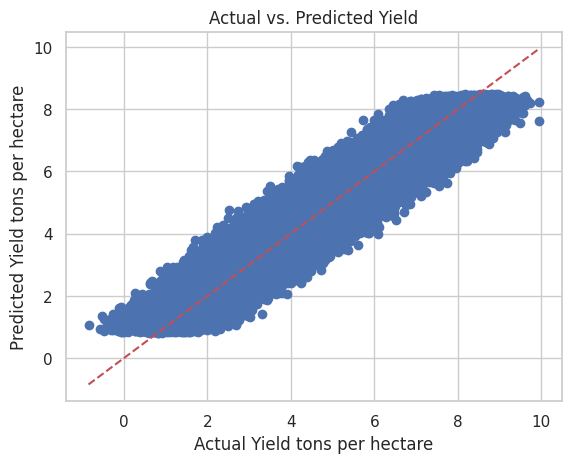

In [ ]:
lr_model = LinearRegression()
train_model(model_object = lr_model, k_fold = 5, n_monte_carlo = 10)

##### Random Forest


MSE and R-squared :
Mean Squared Error: 0.27704219992677515
R-squared Score: 0.9039031166394452

KFold Cross-Validation:
K-Fold Cross-Validation k =  5
Mean Squared Error (Mean) : -0.27713448847844613
Mean Squared Error (Std) : 0.000540651612907025
kfold_rmse(Mean) : 0.5264353947186288

Monte Carlo Cross-Validation:
n =  10
Mean Squared Error (Mean) : -0.278105110633999
Mean Squared Error (Std) : 0.0009599394657281591
Monto Carlo_rmse(Mean) : 0.5273559358800595


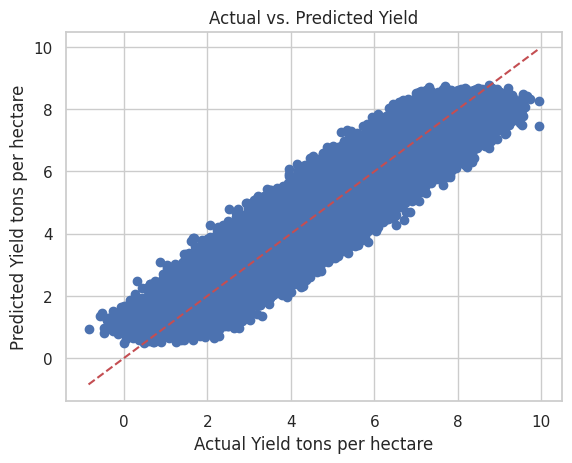

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=20)
train_model(model_object = rf, k_fold = 5, n_monte_carlo = 10)

##### Decision Tree


MSE and R-squared :
Mean Squared Error: 0.5315076161120954
R-squared Score: 0.815637381582046

KFold Cross-Validation:
K-Fold Cross-Validation k =  5
Mean Squared Error (Mean) : -0.5306941992684784
Mean Squared Error (Std) : 0.001362953646211201
kfold_rmse(Mean) : 0.7284870104167462

Monte Carlo Cross-Validation:
n =  10
Mean Squared Error (Mean) : -0.5296696686142042
Mean Squared Error (Std) : 0.0010630610302203565
Monto Carlo_rmse(Mean) : 0.7277837142621695


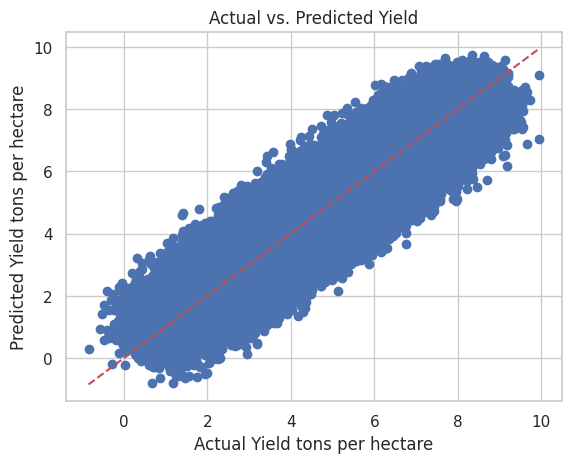

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
train_model(model_object = dt, k_fold = 5, n_monte_carlo = 10)

##### PCA

Number of components retained: 11

MSE and R-squared :
Mean Squared Error: 0.2508087608479783
R-squared Score: 0.9130026391525052

KFold Cross-Validation:
K-Fold Cross-Validation k =  5
Mean Squared Error (Mean) : -0.2505251785616177
Mean Squared Error (Std) : 0.0006395384720186155
kfold_rmse(Mean) : 0.5005244947737895

Monte Carlo Cross-Validation:
n =  10
Mean Squared Error (Mean) : -0.2508434821500304
Mean Squared Error (Std) : 0.0010390154553759608
Monto Carlo_rmse(Mean) : 0.5008417003965969


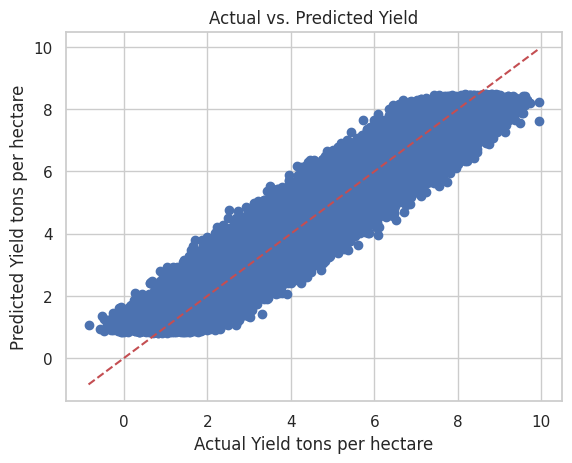

In [ ]:
from sklearn.decomposition import PCA

X = yield_df_scaled.drop('Yield_tons_per_hectare', axis=1)  # Features

# Retain variance
pca = PCA(n_components=.80)
X_pca = pca.fit_transform(X)
# Check how many components were retained
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")

train_model(model_object =LinearRegression(), k_fold=5, n_monte_carlo=10, X_updated=True, new_X=X_pca)

## Deployment

Based on the three models (Linear Regression - Random Forest - Decision Tree) with the following RMSE using kfold approach:
1. Linear Regression : 0.5004856731183922
2. Random Forest : 0.5264353947186288
3. Decision Tree : 0.7284870104167462
4. PCA : 0.5005244947737895

The best model is Linear Regression. As a result, we decided to deploy the Linear Regression model. But First let us see the most important feature in the dataset.


##### See what are the most important features

In [ ]:
# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                    Feature  Coefficient
18     Fertilizer_Used_True     1.499406
0               Rainfall_mm     1.298387
19     Irrigation_Used_True     1.199223
1       Temperature_Celsius     0.143947
6            Soil_Type_Clay     0.003190
9           Soil_Type_Sandy     0.002746
13                Crop_Rice     0.001476
16  Weather_Condition_Rainy     0.001454
2           Days_to_Harvest     0.000527
3              Region_North     0.000454
7            Soil_Type_Loam     0.000178
8           Soil_Type_Peaty     0.000071
17  Weather_Condition_Sunny    -0.000249
4              Region_South    -0.000479
14             Crop_Soybean    -0.000728
5               Region_West    -0.000749
10           Soil_Type_Silt    -0.001662
11              Crop_Cotton    -0.001722
15               Crop_Wheat    -0.002918
12               Crop_Maize    -0.003013


Top Influencers: The most impactful features are Fertilizer_Used_True (+1.5), Rainfall_mm (+1.3), and Irrigation_Used_True (+1.2), indicating fertilizer application, adequate rainfall, and irrigation significantly boost yields.

Moderate Impact: Temperature_Celsius (+0.14) has a mild positive influence, suggesting that optimal temperature conditions support crop growth but are less critical than water and nutrients.

Minimal Contributors: Features like Soil_Type_Clay, Days_to_Harvest, and crop-specific variables (e.g., Crop_Rice) have near-zero coefficients, showing minimal direct impact on yield in this dataset.

Negative Influences: Certain crops (Crop_Maize, Crop_Wheat) and regions (Region_West, Region_South) slightly decrease yields, possibly due to suboptimal growing conditions or resource mismatches.

##### Train the model on the whole dataset


The code trains a Linear Regression model using the complete dataset to predict crop yield (in tons per hectare). It first separates the dataset into features (X, all columns except the target) and the target variable (y, yield). Then, the model is initialized and trained (fit) on the full dataset. Finally, it uses the trained model to make predictions (predict) on the same data, outputting the predicted yields. This process helps understand how well the model captures the relationship between the features and the target variable


In [ ]:
#Train the linear regression model using the complete dataset.

# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into features (X) and target variable (y)
X = yield_df_scaled.drop('Yield_tons_per_hectare', axis=1)  # Features: All columns except the target
y = yield_df_scaled['Yield_tons_per_hectare']               # Target variable: Yield in tons per hectare

# Train the model on the entire dataset
model = LinearRegression()  # Initialize the linear regression model
model.fit(X, y)            # Fit the model to the data

# Make predictions
y_pred = model.predict(X)  # Predict yield using the trained model

# Output the predicted yield
print("Predicted Yield:", y_pred)

Predicted Yield: [6.23755957 8.02900544 1.33884625 ... 6.32494191 3.12009362 2.94933332]


For model selection:

Regression is the best model because it has the lowest error (RMSE) and the highest accuracy (R²),(MSE: 0.2508 | RMSE: 0.5008 | R²: 0.9130)  making it the most reliable and accurate for predictions.
The Linear Regression model, identified as the best-performing model, was trained on the complete dataset. This model is optimized and ready for deployment, capable of delivering crop yield predictions for practical use cases

### Save model for deployment

In [ ]:
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as linear_regression_model.pkl")

# Load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")

Model saved as linear_regression_model.pkl
Model loaded successfully


### Load the model

Here we load the model to make sure it

In [ ]:
import pandas as pd
import joblib

# Input data as a dictionary (the one row you provided)
input_data = {
    'Rainfall_mm': [1.335746578300665],
    'Temperature_Celsius': [0.0238208845484907],
    'Days_to_Harvest': [0.6744771579762345],
    'Region_North': [0.0],
    'Region_South': [0.0],
    'Region_West': [1.0],
    'Soil_Type_Clay': [0.0],
    'Soil_Type_Loam': [0.0],
    'Soil_Type_Peaty': [0.0],
    'Soil_Type_Sandy': [1.0],
    'Soil_Type_Silt': [0.0],
    'Crop_Cotton': [1.0],
    'Crop_Maize': [0.0],
    'Crop_Rice': [0.0],
    'Crop_Soybean': [0.0],
    'Crop_Wheat': [0.0],
    'Weather_Condition_Rainy': [0.0],
    'Weather_Condition_Sunny': [0.0],
    'Fertilizer_Used_True': [1.0],
    'Irrigation_Used_True': [0.0]
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame(input_data)

# Load the trained model pipeline
pipeline = joblib.load('linear_regression_model.pkl')

# Make the prediction
predicted_yield = pipeline.predict(input_df)

# Output the predicted yield
print("Predicted Yield:", predicted_yield[0], " Real one: 6.555816")


Predicted Yield: 6.5383338548826675  Real one: 6.555816
